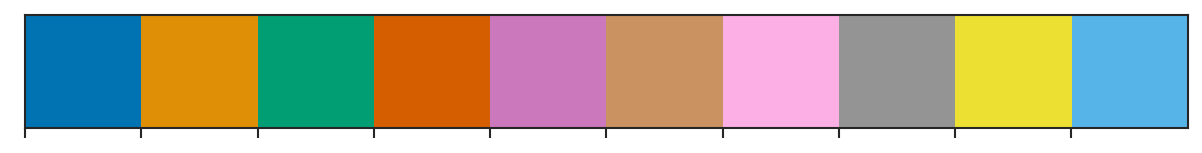

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150

import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

cpal = sns.color_palette("colorblind",10)
sns.palplot(sns.color_palette("colorblind"))
sns.set_palette("colorblind")

import pandas as pd
from astropy.io import ascii

import numpy as np
import astropy.constants as c

from astropy.table import Table

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.dpi"] = 150

# Young planet table (TJD, edited 8/24/2022)

In [8]:
yng = pd.read_csv('./shrink.csv')
yng.head(70)


yng['logage'] = np.zeros(len(yng))
yng['logage_errlo'] = np.zeros(len(yng))
yng['logage_errhi'] = np.zeros(len(yng))

for i in range(len(yng)):
    yng['logage'][i] = np.log10(yng['pl_age'][i]*1.0e9)
    yng['logage_errlo'][i] = np.log10(yng['pl_age'][i]*1.0e9)-np.log10((yng['pl_age'][i]-yng['pl_age_errlo'][i])*1.0e9)
    yng['logage_errhi'][i] = np.log10((yng['pl_age'][i]+yng['pl_age_errhi'][i])*1.0e9) - np.log10(yng['pl_age'][i]*1.0e9)
    

yng['logrp'] = np.zeros(len(yng))
yng['logrp_err'] = np.zeros(len(yng))
    
for i in range(len(yng)):
    _rp = yng['pl_rade'][i]
    _errlo = yng['pl_rade_errlo'][i]
    _errhi = yng['pl_rade_errhi'][i]
    
    _rpmc = np.random.normal(_rp, np.max([_errlo, _errhi]), 10000)
    
    yng['logrp'][i] = np.median(np.log10(_rpmc))
    yng['logrp_err'][i] = np.std(np.log10(_rpmc))

/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/2426673708.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yng['logage'][i] = np.log10(yng['pl_age'][i]*1.0e9)
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/2426673708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yng['logage_errlo'][i] = np.log10(yng['pl_age'][i]*1.0e9)-np.log10((yng['pl_age'][i]-yng['pl_age_errlo'][i])*1.0e9)
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/2426673708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

# NASA Exoplanet Archive (accessed 7/27/2022)

In [5]:
nea = ascii.read('./NEA_2022.07.27.tbl', format='ipac')
nea = nea.to_pandas()
nea.head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
1,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
2,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,...,NaN,2014-05-14,2008-12,2014-05-14,0,1,1,0,0,0
3,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,4,1,0,0
4,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,4,3,0,0


In [14]:
for col in nea.columns:
    print(col)

pl_name
hostname
pl_letter
hd_name
hip_name
tic_id
gaia_id
default_flag
sy_snum
sy_pnum
sy_mnum
cb_flag
discoverymethod
disc_year
disc_refname
disc_pubdate
disc_locale
disc_facility
disc_telescope
disc_instrument
rv_flag
pul_flag
ptv_flag
tran_flag
ast_flag
obm_flag
micro_flag
etv_flag
ima_flag
dkin_flag
soltype
pl_controv_flag
pl_refname
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbperlim
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxlim
pl_rade
pl_radeerr1
pl_radeerr2
pl_radelim
pl_radj
pl_radjerr1
pl_radjerr2
pl_radjlim
pl_masse
pl_masseerr1
pl_masseerr2
pl_masselim
pl_massj
pl_massjerr1
pl_massjerr2
pl_massjlim
pl_msinie
pl_msinieerr1
pl_msinieerr2
pl_msinielim
pl_msinij
pl_msinijerr1
pl_msinijerr2
pl_msinijlim
pl_cmasse
pl_cmasseerr1
pl_cmasseerr2
pl_cmasselim
pl_cmassj
pl_cmassjerr1
pl_cmassjerr2
pl_cmassjlim
pl_bmasse
pl_bmasseerr1
pl_bmasseerr2
pl_bmasselim
pl_bmassj
pl_bmassjerr1
pl_bmassjerr2
pl_bmassjlim
pl_bmassprov
pl_dens
pl_denserr1
pl_denserr2
pl_denslim
pl_orbeccen

In [28]:
sns.set_style("ticks")
sns.set_palette("vivid")

from adjustText import adjust_text

ValueError: vivid is not a valid palette name

/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


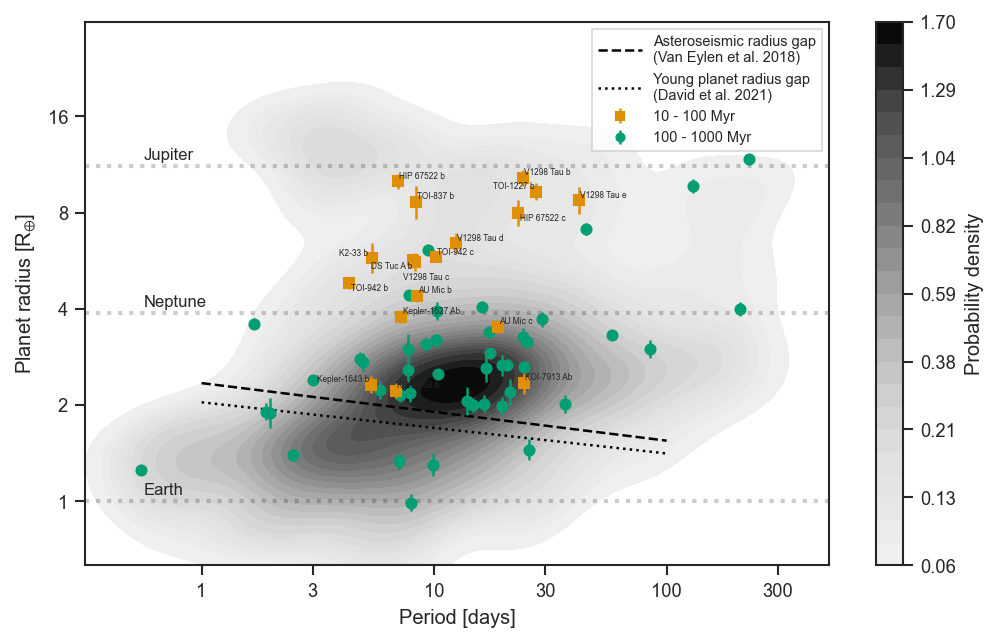

In [29]:
arg = (nea.default_flag==1)
arg &= (abs(nea.pl_radeerr1/nea.pl_rade)<0.1)
arg &= (abs(nea.pl_radeerr2/nea.pl_rade)<0.1)
arg &= (nea.pl_controv_flag==0)
arg &= (nea.disc_instrument=='Kepler CCD Array')


##################################
logspace = True

if logspace==True:
    neax = np.log10(nea['pl_orbper'])
    neay = np.log10(nea['pl_rade'])
    
elif logspace==False:
    neax = nea['pl_orbper']
    neay = nea['pl_rade']

#kernel : {‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }, optional
cmap = sns.light_palette((0, 0, 0), input="husl", as_cmap=True)
sns.kdeplot(neax[arg], neay[arg], 
            shade=True, 
            cmap=cmap, 
            levels=25, 
            bw_adjust=0.9,
            cbar=True, 
            cbar_kws={'format':'%.2f', 'label': 'Probability density'})


plt.axhline(0.0, color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Earth
plt.axhline(np.log10(3.88266098), color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Neptune
plt.axhline(np.log10(11.2089807), color='k', alpha=0.2, ls=':', lw=2, zorder=1) #Jupiter
plt.text(-0.25, np.log10(11.2089807)+0.02, 'Jupiter', size=8)
plt.text(-0.25, np.log10(3.88266098)+0.02, 'Neptune', size=8)
plt.text(-0.25, np.log10(1.0)+0.02, 'Earth', size=8)


# Van Eylen et al. 2018 valley
xvalley = np.log10(np.linspace(1,100,int(1e3)))
yvalley = -0.09*xvalley+0.37
plt.plot(xvalley, yvalley, color='k', ls='--', label='Asteroseismic radius gap\n(Van Eylen et al. 2018)')


# David et al. 2021 valley
yvalley = -0.08*xvalley+0.31
plt.plot(xvalley, yvalley, color='k', ls=':', label='Young planet radius gap\n(David et al. 2021)')


plt.xlim(-0.5,2.7)
plt.ylim(-0.2,1.5)


plt.xlabel('Period [days]')
plt.ylabel('Planet radius [R$_\mathregular{\oplus}$]')
plt.xticks(np.log10([1,3,10,30,100,300]), ['1','3','10','30','100','300'])
plt.yticks(np.log10([1,2,4,8,16]),['1','2','4','8','16'])


yng_arg = (yng['pl_age']+yng['pl_age_errhi'] < 1.0) & (yng['pl_rade_errlo']/yng['pl_rade']<0.15) &  (yng['pl_rade_errhi']/yng['pl_rade']<0.15)
lt100 = yng_arg & (yng['pl_age']<0.1) 
gt100 = yng_arg & (yng['pl_age']>=0.1)

plt.errorbar(np.log10(yng['pl_porb'][lt100]), yng['logrp'][lt100], yerr=yng['logrp_err'][lt100], fmt='s', zorder=998, label='10 - 100 Myr')
plt.errorbar(np.log10(yng['pl_porb'][gt100]), yng['logrp'][gt100], yerr=yng['logrp_err'][gt100], fmt='o', label='100 - 1000 Myr')


_xlabel = np.array(np.log10(yng['pl_porb'][lt100]))
_ylabel = np.array(yng['logrp'][lt100])
_label = np.array(yng['planet_name'][lt100])
                

texts = [plt.text(_xlabel[i], _ylabel[i], _label[i], ha='center', va='center', size=4, zorder=999) 
        for i in range(len(_label))]
adjust_text(texts, lim=10)

plt.legend(frameon=True, markerscale=0.8, ncol=1, prop={'size':7}, handlelength=3, loc='upper right', fancybox=False)

plt.gcf().set_size_inches(0.8*10,0.8*6)
#plt.savefig('/Users/tdavid/Dropbox (Simons Foundation)/talks/2021/sagan/pr.pdf', bbox_inches='tight')
#plt.savefig('/Users/tdavid/Dropbox (Simons Foundation)/talks/2021/sagan/pr-kepler.pdf', bbox_inches='tight')

/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


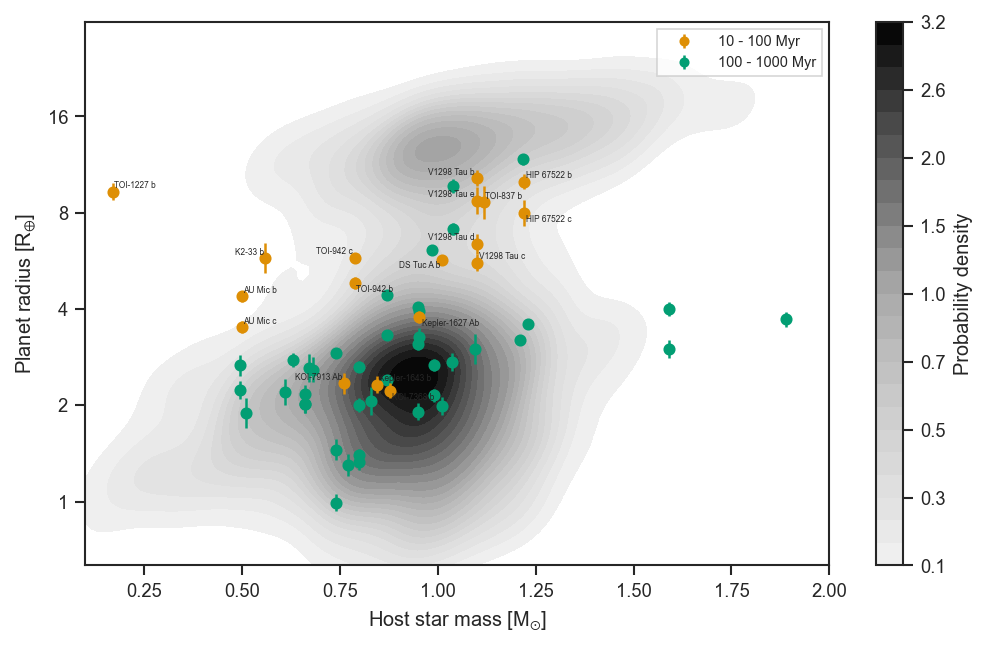

In [33]:
arg = (nea.default_flag==1) &\
      (nea.discoverymethod=='Transit') &\
      (nea.pl_orbper<300)
      #(np.isfinite(nea.st_mass)) &\
      #(np.isfinite(nea.pl_rade)) #& (nea.disc_facility=='Kepler')

sns.kdeplot(nea['st_mass'][arg], neay[arg], 
            shade=True, 
            cmap=cmap, 
            levels=25, 
            bw_adjust=0.9,
            cbar=True, 
            cbar_kws={'format':'%.1f', 'label': 'Probability density'})

plt.errorbar(yng['st_mass'][lt100], yng['logrp'][lt100], yerr=yng['logrp_err'][lt100], fmt='o', zorder=998, label='10 - 100 Myr')
plt.errorbar(yng['st_mass'][gt100], yng['logrp'][gt100], yerr=yng['logrp_err'][gt100], fmt='o', label='100 - 1000 Myr')

_xlabel = np.array(yng['st_mass'][lt100])
_ylabel = np.array(yng['logrp'][lt100])
_label = np.array(yng['planet_name'][lt100])                

texts = [plt.text(_xlabel[i], _ylabel[i], _label[i], ha='center', va='center', size=4, zorder=999) 
        for i in range(len(_label))]
adjust_text(texts, lim=10)

plt.xlim(0.1,2)

plt.ylim(-0.2,1.5)



plt.xlabel('Host star mass [M$_\mathregular{\odot}$]')
plt.ylabel('Planet radius [R$_\mathregular{\oplus}$]')
#plt.xticks(np.log10([1,3,10,30,100,300]), ['1','3','10','30','100','300'])
plt.yticks(np.log10([1,2,4,8,16]),['1','2','4','8','16'])

plt.legend(frameon=True, markerscale=0.8, ncol=1, prop={'size':7}, handlelength=3, loc='upper right', fancybox=False)
plt.gcf().set_size_inches(0.8*10,0.8*6)
plt.show()

# Select well-characterized planets from the Exoplanet Archive

In [3]:
mearth = c.M_earth.cgs.value
rearth = c.R_earth.cgs.value

mthresh = 0.2
rthresh = 0.2

nea['rho_gcc'] = nea['pl_masse']*mearth / (4./3.*np.pi*(nea['pl_rade']*rearth)**3.)

nsamples = 1000
_mp = np.array([np.random.normal(nea['pl_masse'], np.nanmax([nea['pl_masseerr2'], nea['pl_masseerr1']], axis=0)) for n in range(nsamples)])
_rp = np.array([np.random.normal(nea['pl_rade'], np.nanmax([nea['pl_radeerr2'], nea['pl_radeerr1']], axis=0)) for n in range(nsamples)])
_rho = (_mp*mearth)/(4./3.*np.pi*(_rp*rearth)**3.)

nea['rho_gcc'] = np.nanmean(_rho, axis=0)
nea['rho_gcc_err'] = np.nanstd(_rho, axis=0)

nea_m = (nea['default_flag']==1) &\
        (nea['pl_masseerr1']/nea['pl_masse']<mthresh) &\
        (nea['pl_masseerr2']/nea['pl_masse']<mthresh) &\
        (nea['pl_radeerr1']/nea['pl_rade']<rthresh) &\
        (nea['pl_radeerr2']/nea['pl_rade']<rthresh) &\
        (abs(nea['pl_radelim'])!=1) &\
        (abs(nea['pl_masselim'])!=1) &\
        (np.isfinite(nea['rho_gcc'])) &\
        (nea['pl_orbper']<150.) &\
        (nea['st_teff']>4500) &\
        (nea['st_teff']<6500)
        #(nea['discoverymethod']=='Transit') &\

k51 = nea['hostname']=='Kepler-51'

/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/1671814180.py:12: RuntimeWarning: divide by zero encountered in true_divide
  _rho = (_mp*mearth)/(4./3.*np.pi*(_rp*rearth)**3.)
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/1671814180.py:12: RuntimeWarning: invalid value encountered in true_divide
  _rho = (_mp*mearth)/(4./3.*np.pi*(_rp*rearth)**3.)
/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/q3/qrdpn9t13rq5m_6ndvm7n5580001hf/T/ipykernel_69075/1671814180.py:14: RuntimeWarning: Mean of empty slice
  nea['rho_gcc'] = np.nanmean(_rho, axis=0)
/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/nump

In [19]:
#What other planetary systems have two planets with masses > 100 Mearth inside of 0.25 au?

arg = (nea['default_flag']==1) &\
      (nea['pl_masselim']==0) &\
      (nea['pl_masse']>=100) &\
      (nea['pl_orbsmax']<=0.25)

#nea[arg]

#print(nea['hostname'][arg])
#print(len(np.unique(nea['hostname'][arg])))

#_df = pd.DataFrame(nea['hostname'][arg])

_ = []
_x = nea['hostname'][arg].tolist()
#print(len(_x))

for x in _x:
    if x in _:
        print(x)
    
    _.append(x)


GJ 876
TOI-2202


st_teff
   K   
-------
     --
     --
     --
     --
st_teff
   K   
-------
 5144.0
 5144.0


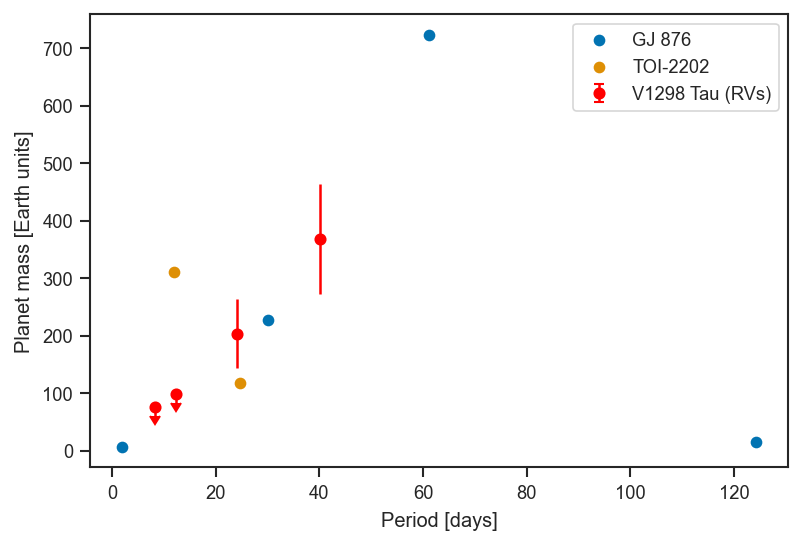

In [20]:
asm_per = [8.24892, 12.4058, 24.1399, 40.2]

for host in ['GJ 876', 'TOI-2202']:
    _ = (nea['default_flag']==1) & (nea['hostname']==host)
    print(nea['st_teff'][_])
    plt.scatter(nea['pl_orbper'][_], nea['pl_masse'][_], label=host)
    
    
uplims = np.array([1, 1, 0, 0], dtype=bool)

plt.errorbar(asm_per, 
             asm_masse, 
             yerr=asm_masseerr, 
             uplims=uplims,
             fmt='o', 
             capsize=0,
             color='r',
             zorder=np.inf, label='V1298 Tau (RVs)')    
    
#plt.scatter(asm_per, asm_masse, label)
#plt.semilogy()
plt.xlabel("Period [days]")
plt.ylabel("Planet mass [Earth units]")
plt.legend()
plt.show()

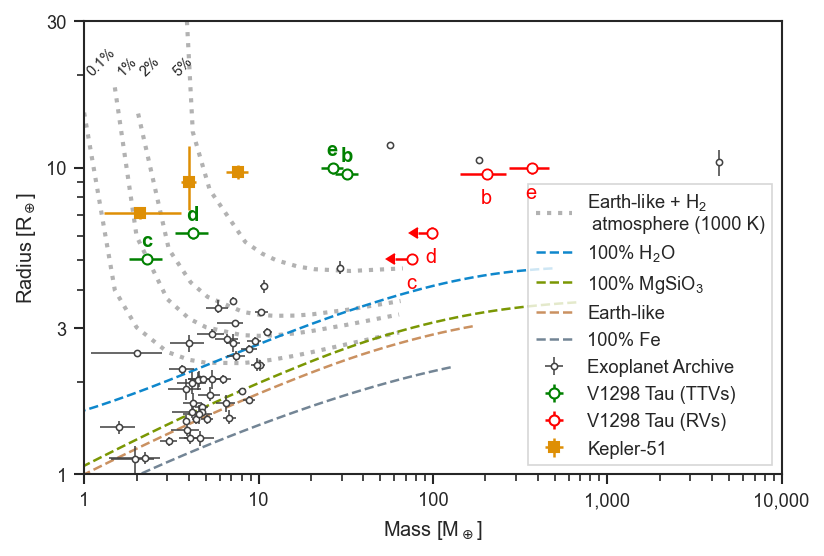

In [25]:
v1298_clr = 'g'
asm_clr = 'r'

ebar_kwargs={"fmt":'o',  
              "mec":'#424242', 
              "ms": 3, 
              "mew":0.75,
              "lw":0.75,
              "mfc":'white',
              "ecolor":'#424242', 
              "rasterized":True,
              "barsabove":False,
              "zorder": 99}

fig, ax = plt.subplots(1,1)

ax.errorbar(nea['pl_masse'][nea_m], nea['pl_rade'][nea_m],
             xerr=[-nea['pl_masseerr2'][nea_m], nea['pl_masseerr1'][nea_m]],
             yerr=[-nea['pl_radeerr2'][nea_m], nea['pl_radeerr1'][nea_m]], 
             **ebar_kwargs, label='Exoplanet Archive')

#ax.scatter(nea['pl_masse'][nea_m], nea['pl_rade'][nea_m], c='None', edgecolors='lightgrey', zorder=98)



ax.loglog()
ax.set_ylim(1,30)
ax.set_xlim(1,10000)
ax.set_yticks([1,3,10,30],['1','3','10','30']);
ax.set_xticks([1,10,100,1000,10000],['1','10','100','1,000','10,000']);
ax.set_xlabel(r'Mass [M$_\oplus$]')
ax.set_ylabel(r'Radius [R$_\oplus$]')

# Feinstein et al. 2021 values
v1298_rade = [5.05, 6.13, 9.53, 9.94]
v1298_radeerr = [0.14, 0.28, 0.32, 0.39]

# Livingston et al. 2022 values. To be updated.
v1298_masse = [2.3, 4.2, 32.3, 26.7]
v1298_masseerr = [0.5, 0.9, 4.7, 3.8]


#v1298_rho_gcc = v1298_masse*mearth / (4./3.*np.pi*(v1298_rade*rearth)**3.)

nsamples = 1000
_mp = np.array([np.random.normal(v1298_masse, v1298_masseerr) for n in range(nsamples)])
_rp = np.array([np.random.normal(v1298_rade, v1298_radeerr) for n in range(nsamples)])
_rho = (_mp*mearth)/(4./3.*np.pi*(_rp*rearth)**3.)

v1298_rho_gcc = np.nanmean(_rho, axis=0)
v1298_rho_gcc_err = np.nanstd(_rho, axis=0)



ax.errorbar(v1298_masse, 
            v1298_rade,
            xerr=v1298_masseerr,
            yerr=v1298_radeerr, 
            fmt='o', 
            color=v1298_clr, 
            mfc='white', 
            label='V1298 Tau (TTVs)');


asm_masse = [0.24, 0.31, 0.64, 1.16]*c.M_jup/c.M_earth
asm_masseerr = [0.05, 0.05, 0.19, 0.30]*c.M_jup/c.M_earth


xuplims = np.array([1, 1, 0, 0], dtype=bool)

# ax.errorbar(asm_masse, 
#             v1298_rade, 
#             xerr=asm_masseerr, 
#             yerr=v1298_radeerr, 
#             xuplims=xuplims,
#             fmt='o', 
#             color=asm_clr,
#             capsize=0,
#             zorder=np.inf, label='V1298 Tau (RVs)')


ax.errorbar(asm_masse[2::], 
            v1298_rade[2::], 
            xerr=asm_masseerr[2::], 
            yerr=v1298_radeerr[2::], 
            fmt='o', 
            color=asm_clr,
            mfc='white',
            zorder=np.inf, label='V1298 Tau (RVs)')


ax.errorbar(asm_masse[0:2], 
            v1298_rade[0:2], 
            xerr=asm_masseerr[0:2], 
            yerr=v1298_radeerr[0:2], 
            xuplims=xuplims[0:2],
            fmt='o', 
            color=asm_clr,
            capsize=0,
            zorder=np.inf)


ax.plot(asm_masse, 
        v1298_rade, 
        'o', ms=3,
        color="white",
        zorder=np.inf)

    
# benchmarks = ['Kepler-51', 'AU Mic', 'DS Tuc A', 'Kepler-11', 'Kepler-223', 'Kepler-79', 'Kepler-87']

benchmarks = ['Kepler-51']

for star in benchmarks:
    arg = nea['hostname'] == star
    
    ax.errorbar(nea['pl_masse'][arg],
            nea['pl_rade'][arg],
            xerr=[-nea['pl_masseerr2'][arg], nea['pl_masseerr1'][arg]],
            yerr=[-nea['pl_radeerr2'][arg], nea['pl_radeerr1'][arg]],
            label=star, fmt='s', zorder=np.inf)
    
    
for i, pl in enumerate(['c','d','b','e']):
    
    ax.text(0.92*v1298_masse[i],
            1.10*v1298_rade[i],
            pl,
            color=v1298_clr,
            weight='bold', 
            zorder=np.inf)
    
    ax.text(0.92*asm_masse[i],
            0.8*v1298_rade[i],
            pl,
            color=asm_clr,
            zorder=np.inf)    
    
    
    


#mel, rel, rhoel, r2rhoel = zeng_curve(comp='earth')
#ax.plot(mel[mel<10], rel[mel<10], '--')
#ax.plot(mel, rel, '--', color=cpal[5])


# labels = ['0.1%', '0.3%', '1%', '2%', '5%']
# for i,_t in enumerate(['01','03','1','2','5']):

labels = ['0.1%', '1%', '2%', '5%']
for i,_t in enumerate(['01','1','2','5']):


    _zeng = Table.read("https://www.cfa.harvard.edu/~lzeng/tables/Earthlike"+_t+"h1000K1mbar.txt", format="ascii")
    if i==0:
        label='Earth-like + H$_\mathregular{2}$\n atmosphere (1000 K)'
    else:
        label=None
    _zeng_rho = _zeng['col1']*mearth / (4./3.*np.pi*(_zeng['col2']*rearth)**3)
    
    #_f = interp1d(_zeng['col1'], _zeng['col2'], kind='linear', fill_value='extrapolate')
    #_xnew = np.arange(np.min(_zeng['col1']), 10, 0.1)
    
    ax.plot(_zeng['col1'], _zeng['col2'], 'k:', lw=2, label=label, alpha=0.3, zorder=1)
    #ax.text(_zeng['col1'][0], _zeng['col2'][0], labels[i], size=7, rotation=45)    
    ax.text(_zeng['col1'][0], 20, labels[i], size=7, rotation=45)    


#Hydrogen mass-radius relation
#hyd = Table.read("https://www.cfa.harvard.edu/~lzeng/tables/massradiushydrogen.txt", format="ascii")
#ax.plot(hyd['col1'], hyd['col2'], 'r:', lw=0.5);


compositions = ['mgsio3', 'h2o', 'fe', 'earthlike']

if 'h2o' in compositions:
    h2o = Table.read("https://www.cfa.harvard.edu/~lzeng/tables/massradius_100percentH2O_700K_1mbar.txt", format="ascii")
    ax.plot(h2o['col1'], h2o['col2'], '--', color='xkcd:water blue', label=r'100% H$_\mathregular{2}$O');

    
if 'mgsio3' in compositions:
    mgsio3 = Table.read("https://www.cfa.harvard.edu/~lzeng/tables/massradiusmgsio3.txt", format="ascii")
    ax.plot(mgsio3['col1'], mgsio3['col2'], '--', color='xkcd:ugly green', label=r'100% MgSiO$_\mathregular{3}$');

if 'earthlike' in compositions:
    el = Table.read("https://lweb.cfa.harvard.edu/~lzeng/tables/massradiusEarthlikeRocky.txt", format="ascii")
    ax.plot(el['col1'], el['col2'], '--', color=cpal[5], label=r'Earth-like')

    
if 'fe' in compositions:
    fe = Table.read("https://lweb.cfa.harvard.edu/~lzeng/tables/massradiusFe.txt", format="ascii")
    ax.plot(fe['col1'], fe['col2'], '--', color='xkcd:steel', label='100% Fe')


ax.plot(c.M_jup/c.M_earth, c.R_jup/c.R_earth)
ax.legend(loc='lower right', fancybox=False);

plt.savefig('/Users/tdavid/Downloads/v1298tau-mass-radius.png', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1)

sns.kdeplot(np.log10(nea['pl_masse'][nea_m]), 
            np.log10(nea['pl_rade'][nea_m]), fill=True, ax=ax, bw_adjust=0.8, cmap='Blues')


# ax.loglog()
ax.set_ylim(0,np.log10(30))
ax.set_xlim(0,4)
ax.set_yticks(np.log10([1,3,10,30]),['1','3','10','30']);
ax.set_xticks(np.log10([1,10,100,1000,10000]),['1','10','100','1,000','10,000']);
# ax.set_xlabel(r'Mass [M$_\oplus$]')
# ax.set_ylabel(r'Radius [R$_\oplus$]')


compositions = ['mgsio3', 'h2o', 'fe', 'earthlike']


if 'mgsio3' in compositions:
    mgsio3 = Table.read("https://www.cfa.harvard.edu/~lzeng/tables/massradiusmgsio3.txt", format="ascii")
    ax.plot(np.log10(mgsio3['col1']), 
            np.log10(mgsio3['col2']), 
            '--', color='xkcd:ugly green', label=r'100% MgSiO$_\mathregular{3}$');

if 'h2o' in compositions:
    h2o = Table.read("https://www.cfa.harvard.edu/~lzeng/tables/massradius_100percentH2O_700K_1mbar.txt", format="ascii")
    ax.plot(np.log10(h2o['col1']), 
            np.log10(h2o['col2']), 
            '--', color='xkcd:water blue', label=r'100% H$_\mathregular{2}$O');

if 'fe' in compositions:
    fe = Table.read("https://lweb.cfa.harvard.edu/~lzeng/tables/massradiusFe.txt", format="ascii")
    ax.plot(np.log10(fe['col1']), 
            np.log10(fe['col2']), '--', color='xkcd:steel', label='100% Fe')

if 'earthlike' in compositions:
    el = Table.read("https://lweb.cfa.harvard.edu/~lzeng/tables/massradiusEarthlikeRocky.txt", format="ascii")
    ax.plot(np.log10(el['col1']), 
            np.log10(el['col2']), 
            '--', color=cpal[5], label=r'Earth-like')


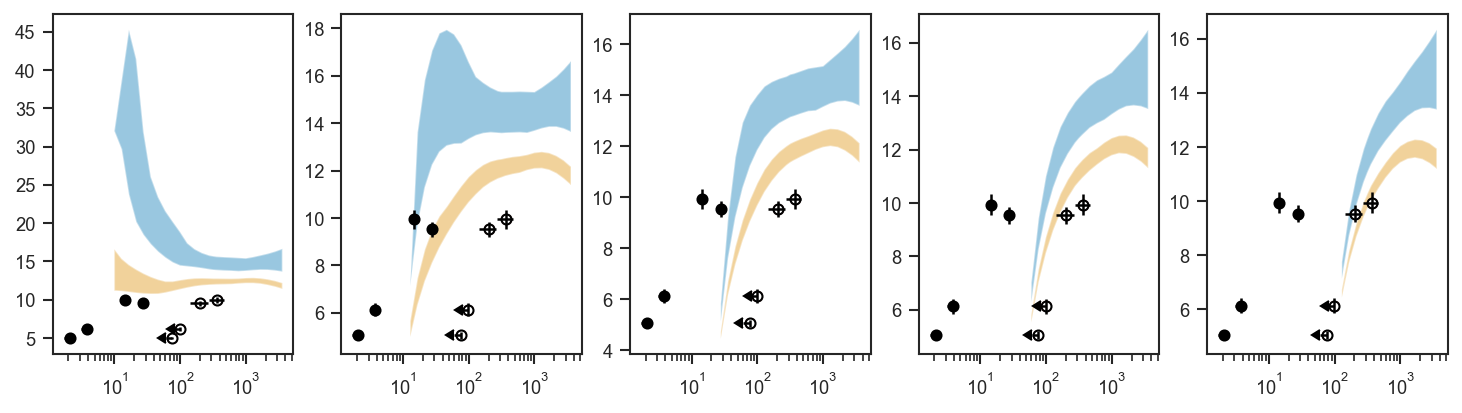

In [344]:
fig, ax = plt.subplots(nrows=1, ncols=len(core_masses), figsize=(12,3))

for i,m in enumerate(core_masses):
    
    young_lo = (df['t_gyr'] == 0.01) & (df['mcore_e']==m) & (df['a_au']==0.1)
    young_hi = (df['t_gyr'] == 0.1) & (df['mcore_e']==m) & (df['a_au']==0.1)
    
    old_lo = (df['t_gyr'] == 1) & (df['mcore_e']==m) & (df['a_au']==0.1)
    old_hi = (df['t_gyr'] == 10) & (df['mcore_e']==m) & (df['a_au']==0.1)    
    
    x1 = df['mass_e'][young_lo]
    y1 = df['radius_j'][young_lo]*c.R_jup/c.R_earth
    x2 = df['mass_e'][young_hi]
    y2 = df['radius_j'][young_hi]*c.R_jup/c.R_earth

    x3 = df['mass_e'][old_lo]
    y3 = df['radius_j'][old_lo]*c.R_jup/c.R_earth
    x4 = df['mass_e'][old_hi]
    y4 = df['radius_j'][old_hi]*c.R_jup/c.R_earth
    
    
    ax[i].fill(
        np.append(x1, x2[::-1]),
        np.append(y1, y2[::-1]), alpha=0.4)
    
    ax[i].fill(
        np.append(x3, x4[::-1]),
        np.append(y3, y4[::-1]), alpha=0.4)    

    ax[i].semilogx()
    
    ax[i].errorbar(v1298_masse, 
                 v1298_rade,
                 xerr=v1298_masseerr,
                 yerr=v1298_radeerr, zorder=np.inf, fmt='o', color='k', label='V1298 Tau (TTVs)');

    ax[i].errorbar(asm_masse, 
                v1298_rade, 
                xerr=asm_masseerr, 
                yerr=v1298_radeerr, 
                xuplims=xuplims,
                fmt='o',
                color='white',                   
                mfc='white',
                ecolor='k',
                mec='k',
                capsize=0,
                zorder=np.inf, barsabove=False, label='V1298 Tau (RVs)')    
    ax[i].scatter(asm_masse, 
                  v1298_rade, marker='o', s=20, color='red')
    
plt.show()

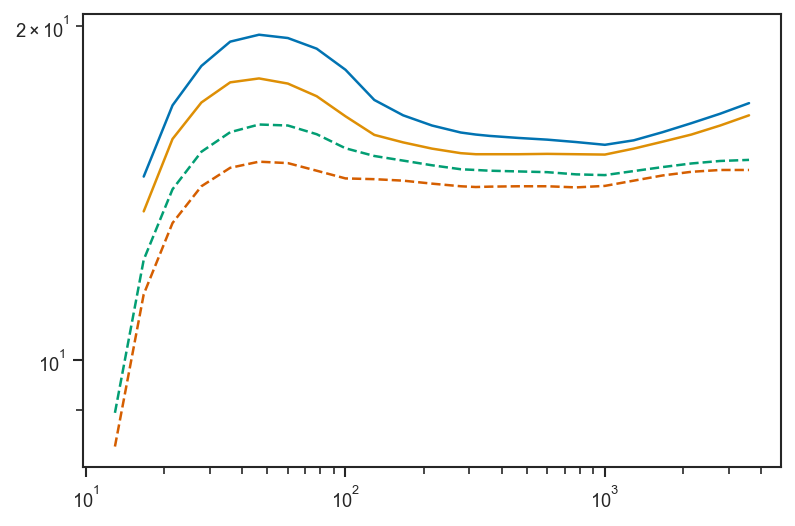

In [310]:
df = pd.read_csv('./fortney2007/fortney_2007.csv')
df.head()

#np.unique(df['t_gyr'])

_ = (df['mcore_e']==10) & (df['a_au']==0.045) & (df['t_gyr']==0.01)
plt.plot(df['mass_e'][_],df['radius_j'][_]*c.R_jup/c.R_earth)

_ = (df['mcore_e']==10) & (df['a_au']==0.1) & (df['t_gyr']==0.01)
plt.plot(df['mass_e'][_],df['radius_j'][_]*c.R_jup/c.R_earth)

_ = (df['mcore_e']==10) & (df['a_au']==0.045) & (df['t_gyr']==0.0316)
plt.plot(df['mass_e'][_],df['radius_j'][_]*c.R_jup/c.R_earth, '--')

_ = (df['mcore_e']==10) & (df['a_au']==0.1) & (df['t_gyr']==0.0316)
plt.plot(df['mass_e'][_],df['radius_j'][_]*c.R_jup/c.R_earth, '--')









plt.loglog()
plt.show()

[]

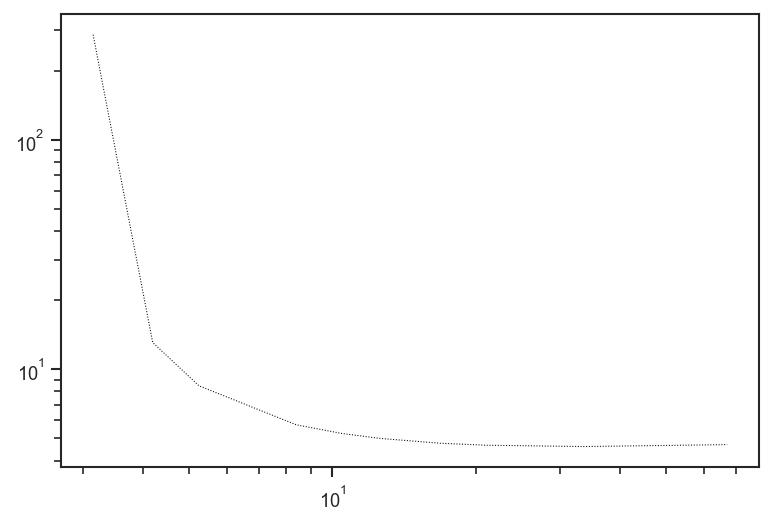

In [219]:
def zeng_curve(comp='earth'):
    
    url_dict = {"earth": "https://www.cfa.harvard.edu/~lzeng/tables/massradiusEarthlikeRocky.txt",
                "iron": "https://www.cfa.harvard.edu/~lzeng/tables/massradiusFe.txt",
                "rock": "https://www.cfa.harvard.edu/~lzeng/tables/massradiusmgsio3.txt"}
    
    data = Table.read(url_dict[comp], format="ascii")
    mass = data['col1']
    radius = data['col2']
    rho = mass*mearth / (4./3.*np.pi*(radius*rearth)**3.)
    
    r2rho = interp1d(radius, rho, fill_value='extrapolate')
    
    return mass,radius,rho,r2rho



hyd = Table.read("https://www.cfa.harvard.edu/~lzeng/tables/massradiushydrogen.txt", format="ascii")

plt.plot(_zeng['col1'], _zeng['col2'], 'k:', lw=0.5);
plt.loglog()

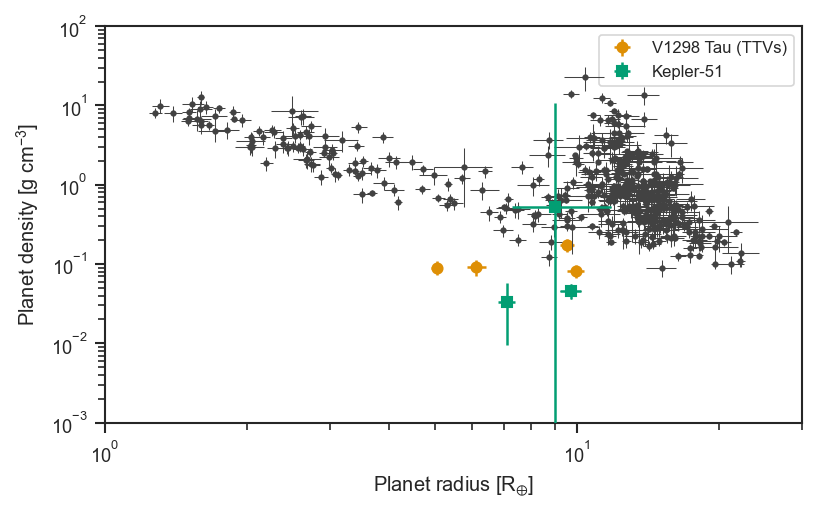

In [10]:
from astropy.table import Table

from scipy.interpolate import interp1d

import matplotlib.colors as mcolors
from matplotlib.patches import Polygon

def gradient_fill(x, y, fill_color=None, ax=None, **kwargs):
    """
    Plot a line with a linear alpha gradient filled beneath it.

    Parameters
    ----------
    x, y : array-like
        The data values of the line.
    fill_color : a matplotlib color specifier (string, tuple) or None
        The color for the fill. If None, the color of the line will be used.
    ax : a matplotlib Axes instance
        The axes to plot on. If None, the current pyplot axes will be used.
    Additional arguments are passed on to matplotlib's ``plot`` function.

    Returns
    -------
    line : a Line2D instance
        The line plotted.
    im : an AxesImage instance
        The transparent gradient clipped to just the area beneath the curve.
    """
    if ax is None:
        ax = plt.gca()

    line, = ax.plot(x, y, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    alpha = line.get_alpha()
    alpha = 0.3 if alpha is None else alpha

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(alpha, 0, 100)[:,None]

    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)
    
    ax.autoscale(True)
    return line, im


def zeng_curve(comp='earth'):
    
    url_dict = {"earth": "https://www.cfa.harvard.edu/~lzeng/tables/massradiusEarthlikeRocky.txt",
                "iron": "https://www.cfa.harvard.edu/~lzeng/tables/massradiusFe.txt",
                "rock": "https://www.cfa.harvard.edu/~lzeng/tables/massradiusmgsio3.txt"}
    
    data = Table.read(url_dict[comp], format="ascii")
    mass = data['col1']
    radius = data['col2']
    rho = mass*mearth / (4./3.*np.pi*(radius*rearth)**3.)
    
    r2rho = interp1d(radius, rho, fill_value='extrapolate')
    
    return mass,radius,rho,r2rho


def composition_plot(fig_path=None,
                     point_shade=False, 
                     ebar_kwargs={"fmt":'o', 
                      "mfc":'#424242', 
                      "mec":'#424242', 
                      "ms":2, 
                      "mew":1,
                      "lw":0.5,
                      "ecolor":'#424242', 
                      "rasterized":True,
                      "barsabove":True,
                      "zorder": np.inf}):

    se_clr = '#b89f8c'
    sn_clr = '#97b6c7'
    
    if point_shade==True:
        plt.errorbar(nea['pl_rade'][nea_m], nea['rho_gcc'][nea_m],
                 xerr=[-nea['pl_radeerr2'][nea_m],nea['pl_radeerr1'][nea_m]],
                 yerr=nea['rho_gcc_err'][nea_m], fmt='.', color='k', lw=0.5, zorder=998, rasterized=True)
        
        
        plt.scatter(nea['pl_rade'][nea_m], nea['rho_gcc'][nea_m], 
                    c=nea['pl_orbper'][nea_m], cmap=cmap, zorder=999, edgecolors='k', vmin=1, vmax=20, rasterized=True)

        plt.colorbar(label='Orbital period [d]')
        
        #plt.axvspan(1.56,1.87, color=tt_cpal[1], alpha=0.4, lw=0, label='Young planet gap\n(David et al. 2021)')
        #plt.axvspan(v18(3),v18(30), color=tt_cpal[0], alpha=0.4, lw=0, label='Asteroseismic gap\n(Van Eylen et al. 2018)')
        
        
    elif point_shade==False:
        plt.errorbar(nea['pl_rade'][nea_m], nea['rho_gcc'][nea_m],
                     xerr=[-nea['pl_radeerr2'][nea_m], nea['pl_radeerr1'][nea_m]],
                     yerr=nea['rho_gcc_err'][nea_m], **ebar_kwargs)
        
        #plt.axvspan(1.56,1.87, color=cpal[1], alpha=0.75, lw=0, label='Young planet gap\n(David et al. 2021)')
        #plt.fill_between([v18(30),v18(3)],[18,18], facecolor="none", hatch="//////", edgecolor="darkgrey", linewidth=0.0, label='Asteroseismic gap\n(Van Eylen et al. 2018)')

        
#     earth_m, earth_r, earth_rho, earth_r2rho = zeng_curve(comp='earth')
#     rock_m, rock_r, rock_rho, rock_r2rho = zeng_curve(comp='rock')
#     iron_m, iron_r, iron_rho, iron_r2rho = zeng_curve(comp='iron')
    
#     _r = np.linspace(0.5,3.5,1000)
#     plt.fill_between(_r, rock_r2rho(_r), iron_r2rho(_r), color=se_clr, alpha=0.2)
#     plt.plot(earth_r, earth_rho, se_clr, label='Earth-like')
#     plt.plot(rock_r, rock_rho, ls=':', lw=0.5, color=se_clr)
#     plt.plot(iron_r, iron_rho, ls=':', lw=0.5, color=se_clr)

#     labels = ['0.1%', '0.3%', '1%', '2%', '5%']
#     for i,_t in enumerate(['01','03','1','2','5']):

#         _zeng = Table.read("https://www.cfa.harvard.edu/~lzeng/tables/Earthlike"+_t+"h700K1mbar.txt", format="ascii")
#         if i==0:
#             label='Earth-like + H$_\mathregular{2}$\n atmosphere (700 K)'
#         else:
#             label=None
#         _zeng_rho = _zeng['col1']*mearth / (4./3.*np.pi*(_zeng['col2']*rearth)**3)
#         plt.plot(_zeng['col2'], _zeng_rho, 'k:', lw=0.5, label=label)
#         plt.text(_zeng['col2'][-1], _zeng_rho[-1], labels[i], size=7, rotation=45)    

#         if i==0:
#             gradient_fill(_zeng['col2'], _zeng_rho, **{'color': sn_clr, 'ls':':'})        

#     plt.text(0.9, 7, 'rocky\nplanets', color='#6a6b6b', size=8)
#     plt.text(0.6, 2.7, '100% MgSiO$_\mathregular{3}$', color='#6a6b6b', size=7, rotation=14)
#     plt.text(0.52, 8.8, '100% Fe', color='#6a6b6b', size=7, rotation=38)
#     plt.text(3.7, 5, 'volatile-rich\nplanets', color='#6a6b6b', size=8)


    plt.errorbar(v1298_rade, 
                v1298_rho_gcc,
                xerr=v1298_radeerr,
                yerr=v1298_rho_gcc_err, 
                fmt='o', label='V1298 Tau (TTVs)');



    benchmarks = ['Kepler-51']

    for star in benchmarks:
        arg = nea['hostname'] == star
    
        plt.errorbar(nea['pl_rade'][arg],
                nea['rho_gcc'][arg],
                xerr=[-nea['pl_radeerr2'][arg], nea['pl_radeerr1'][arg]],
                yerr=nea['rho_gcc_err'][arg],
                label=star, fmt='s', zorder=np.inf)

    plt.ylabel('Planet density [g cm$^\mathregular{-3}$]')
    plt.xlabel(r'Planet radius [R$_\mathregular{\oplus}$]')
    plt.legend(prop={'size':8}, loc='best')
    
    
    plt.xlim(1,30)
    plt.ylim(0.001,100)
    plt.loglog()

    plt.gcf().set_size_inches(6,3.5)
    if fig_path:
        plt.savefig(fig_path)
    plt.show()
    
composition_plot()

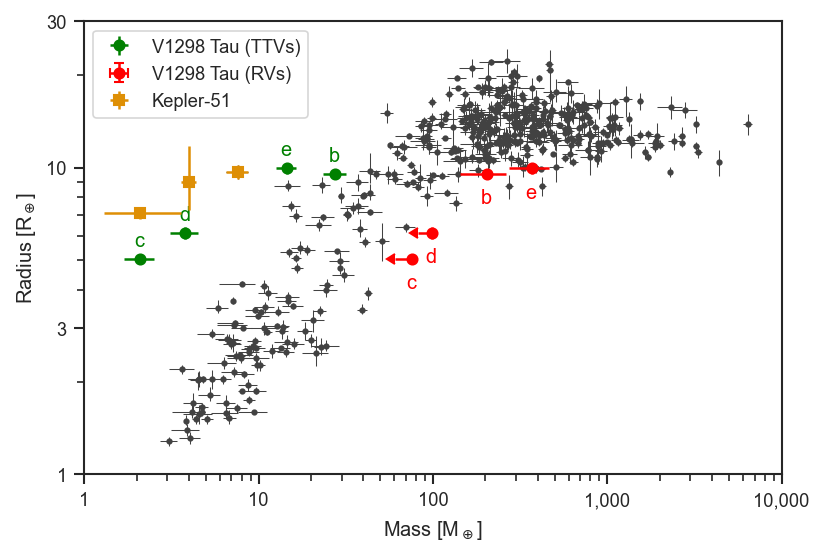

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["figure.dpi"] = 150

ebar_kwargs={"fmt":'o', 
              "mfc":'#424242', 
              "mec":'#424242', 
              "ms":2, 
              "mew":1,
              "lw":0.5,
              "ecolor":'#424242', 
              "rasterized":True,
              "barsabove":True,
              "zorder": np.inf}

fig, ax = plt.subplots(1,1)

ax.errorbar(nea['pl_masse'][nea_m], nea['pl_rade'][nea_m],
             xerr=[-nea['pl_masseerr2'][nea_m], nea['pl_masseerr1'][nea_m]],
             yerr=[-nea['pl_radeerr2'][nea_m], nea['pl_radeerr1'][nea_m]], 
             **ebar_kwargs)



ax.loglog()
ax.set_ylim(1,30)
ax.set_xlim(1,10000)
ax.set_yticks([1,3,10,30],['1','3','10','30']);
ax.set_xticks([1,10,100,1000,10000],['1','10','100','1,000','10,000']);
ax.set_xlabel(r'Mass [M$_\oplus$]')
ax.set_ylabel(r'Radius [R$_\oplus$]')

#Feinstein et al. 2021 values
v1298_rade = [5.05, 6.13, 9.53, 9.94]
v1298_radeerr = [0.14, 0.28, 0.32, 0.39]

v1298_masse = [2.1, 3.8, 27.6, 14.5]
v1298_masseerr = [0.4, 0.7, 4.2, 1.9]


v1298_clr = 'g'
asm_clr = 'r'

ax.errorbar(v1298_masse, 
            v1298_rade,
            xerr=v1298_masseerr,
            yerr=v1298_radeerr, fmt='o', color=v1298_clr, label='V1298 Tau (TTVs)');


asm_masse = [0.24, 0.31, 0.64, 1.16]*c.M_jup/c.M_earth
asm_masseerr = [0.05, 0.05, 0.19, 0.30]*c.M_jup/c.M_earth


xuplims = np.array([1, 1, 0, 0], dtype=bool)

ax.errorbar(asm_masse, 
            v1298_rade, 
            xerr=asm_masseerr, 
            yerr=v1298_radeerr, 
            xuplims=xuplims,
            fmt='o', 
            color=asm_clr,
            capsize=0,
            zorder=np.inf, label='V1298 Tau (RVs)')


for i, pl in enumerate(['c','d','b','e']):
    
    ax.text(0.92*v1298_masse[i],
            1.10*v1298_rade[i],
            pl,
            color=v1298_clr, 
            zorder=np.inf)
    
    ax.text(0.92*asm_masse[i],
            0.8*v1298_rade[i],
            pl,
            color=asm_clr,
            zorder=np.inf)    
    
    
# benchmarks = ['Kepler-51', 'AU Mic', 'DS Tuc A', 'Kepler-11', 'Kepler-223', 'Kepler-79', 'Kepler-87']

benchmarks = ['Kepler-51']

for star in benchmarks:
    arg = nea['hostname'] == star
    
    ax.errorbar(nea['pl_masse'][arg],
            nea['pl_rade'][arg],
            xerr=[-nea['pl_masseerr2'][arg], nea['pl_masseerr1'][arg]],
            yerr=[-nea['pl_radeerr2'][arg], nea['pl_radeerr1'][arg]],
            label=star, fmt='s', zorder=np.inf)


    
ax.legend()

#plt.savefig('/Users/tdavid/Downloads/v1298tau-mass-radius.png', bbox_inches='tight')

In [13]:
#What is the outlier?
#mr_outliers = nea_m & (nea['pl_masse']>0) & (nea['pl_masse']<10) & (nea['pl_rade']>4)
mr_outliers = (nea['pl_masse']>0) & (nea['pl_masse']<10) & (nea['pl_rade']>4)
print(nea['pl_name'][mr_outliers])

#Kepler-87 is the outlier super-Earth with low density, with a long period of 191 d. 
#It seems to be an old star with a transiting Jupiter around 115 d.

  pl_name   
------------
  HD 28109 c
    K2-141 c
 Kepler-11 e
Kepler-223 d
Kepler-223 e
 Kepler-47 c
 Kepler-51 b
 Kepler-51 c
 Kepler-51 d
 Kepler-79 d
 Kepler-87 c


# Comparison with Fortney et al. 2007 models

In [277]:
df = pd.read_csv('./fortney2007/fortney_2007.csv')
df.head()

,mass_e,mass_j,radius_j,g_m_s2,tint_k,l_erg_s,mcore_e,a_au,t_gyr
0,21.54,0.068,11.401,0.013,57.1,5.040000e+25,0.0,0.045,0.001
1,27.83,0.088,11.071,0.018,72.4,1.240000e+26,0.0,0.045,0.001
2,35.94,0.113,9.849,0.029,95.6,2.970000e+26,0.0,0.045,0.001
3,46.42,0.146,8.189,0.054,127.1,6.400000e+26,0.0,0.045,0.001
4,59.95,0.189,6.324,0.118,183.6,1.650000e+27,0.0,0.045,0.001


In [278]:
# yrs = np.unique(df['t_gyr'])


# for yr in yrs:
#     arg = (df['t_gyr'] == yr) & (df['mcore_e']>0) & (df['a_au']>0.05)
    
#     if (yr>=0.01) & (yr<=0.05):
#         plt.scatter(df['mass_e'][arg], df['radius_j'][arg]*c.R_jup/c.R_earth, color='k', label=yr, zorder=np.inf)
        
#     if (yr>=1) & (yr<=10):
#         plt.scatter(df['mass_e'][arg], df['radius_j'][arg]*c.R_jup/c.R_earth, color='r', label=yr)    
#     else:
#         pass
    
    
# plt.errorbar(v1298_masse, 
#              v1298_rade,
#              xerr=v1298_masseerr,
#              yerr=v1298_radeerr, fmt='o', color=v1298_clr, label='V1298 Tau (TTVs)');

# plt.errorbar(asm_masse, 
#             v1298_rade, 
#             xerr=asm_masseerr, 
#             yerr=v1298_radeerr, 
#             xuplims=xuplims,
#             fmt='o', 
#             color='b',
#             capsize=0,
#             zorder=np.inf, label='V1298 Tau (RVs)')

# plt.legend()
# plt.loglog()
# plt.show()

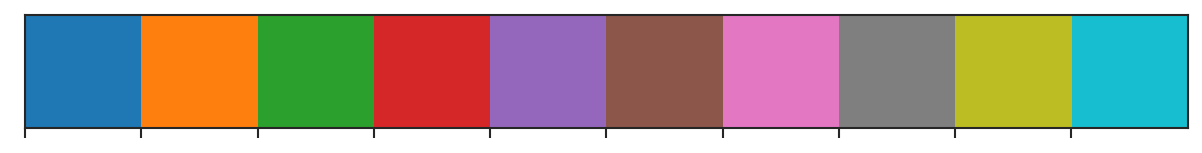

In [279]:
sns.palplot(sns.color_palette('tab10'))

In [283]:
df['a_au']

0       0.045
1       0.045
2       0.045
3       0.045
4       0.045
        ...  
1825    0.100
1826    0.100
1827    0.100
1828    0.100
1829    0.100
Name: a_au, Length: 1830, dtype: float64

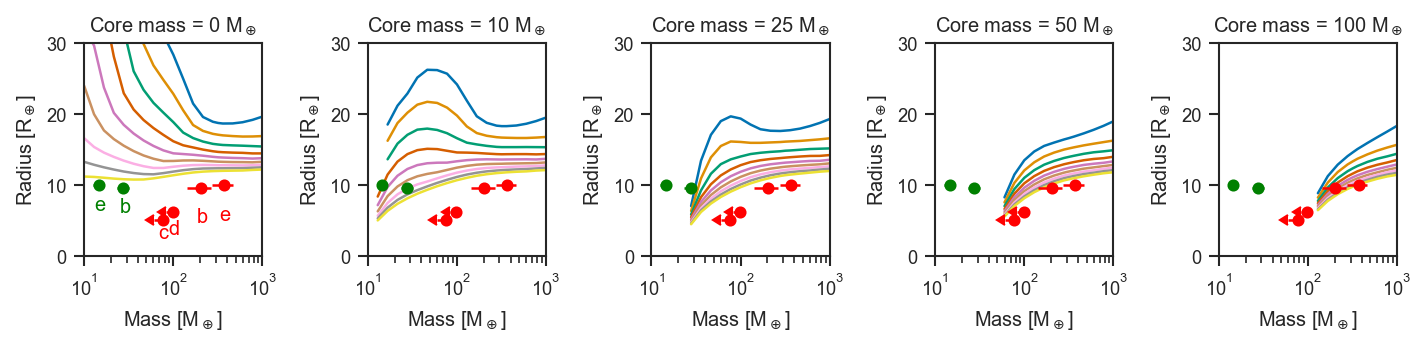

In [280]:
v1298_clr = 'g'
asm_clr = 'r'

core_masses = np.unique(df['mcore_e'])
ages = np.unique(df['t_gyr'])
fig, ax = plt.subplots(nrows=1, ncols=len(core_masses), figsize=(0.8*12,0.8*3))

sns.set_palette('Blues', len(ages))

for i,m in enumerate(core_masses):
    for age in ages:
        
        arg = (df['t_gyr'] == age) & (df['mcore_e']==m) & (df['a_au']==0.1)
           
        #if age<0.1:
        #    ls = '-'
        #elif age>=0.1:
        #    ls = '--'

        ax[i].plot(df['mass_e'][arg], 
                 df['radius_j'][arg]*c.R_jup/c.R_earth, 
                 label=yr, zorder=1)
    
    ax[i].semilogx()
    
    ax[i].errorbar(v1298_masse, 
                 v1298_rade,
                 xerr=v1298_masseerr,
                 yerr=v1298_radeerr, zorder=np.inf, fmt='o', color=v1298_clr, label='V1298 Tau (TTVs)');

    ax[i].errorbar(asm_masse, 
                v1298_rade, 
                xerr=asm_masseerr, 
                yerr=v1298_radeerr, 
                xuplims=xuplims,
                fmt='o', 
                color=asm_clr,
                capsize=0,
                zorder=np.inf, label='V1298 Tau (RVs)')        

    ax[i].set_xlim(10,1000)
    ax[i].set_ylim(0,30)
    
    ax[i].set_xlabel(r'Mass [M$_\oplus$]')
    ax[i].set_ylabel(r'Radius [R$_\oplus$]')
    ax[i].set_title('Core mass = '+str(int(m))+' M$_\oplus$')
    
for i, pl in enumerate(['','','b','e']):
    ax[0].text(0.9*v1298_masse[i],
            0.65*v1298_rade[i],
            pl,
            color=v1298_clr, 
            zorder=np.inf)
    
for i, pl in enumerate(['c','d','b','e']):
    ax[0].text(0.9*asm_masse[i],
            0.5*v1298_rade[i],
            pl,
            color=asm_clr,
            zorder=np.inf)    
                   
plt.tight_layout()

In [278]:
np.unique(df['t_gyr'])

array([1.0000e-03, 3.2000e-03, 1.0000e-02, 3.1600e-02, 1.0000e-01,
       3.1620e-01, 1.0000e+00, 3.1623e+00, 1.0000e+01])

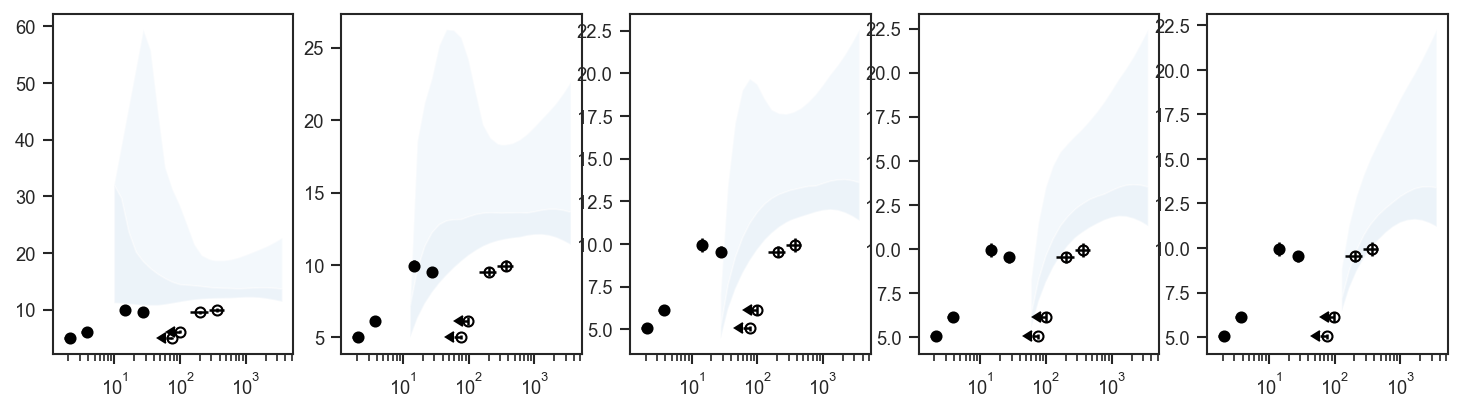

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=len(core_masses), figsize=(12,3))

for i,m in enumerate(core_masses):
    
    young_lo = (df['t_gyr'] == 0.001) & (df['mcore_e']==m) & (df['a_au']==0.1)
    young_hi = (df['t_gyr'] == 0.1) & (df['mcore_e']==m) & (df['a_au']==0.1)
    
    old_lo = (df['t_gyr'] == 0.1) & (df['mcore_e']==m) & (df['a_au']==0.1)
    old_hi = (df['t_gyr'] == 10) & (df['mcore_e']==m) & (df['a_au']==0.1)    
    
    x1 = df['mass_e'][young_lo]
    y1 = df['radius_j'][young_lo]*c.R_jup/c.R_earth
    x2 = df['mass_e'][young_hi]
    y2 = df['radius_j'][young_hi]*c.R_jup/c.R_earth

    x3 = df['mass_e'][old_lo]
    y3 = df['radius_j'][old_lo]*c.R_jup/c.R_earth
    x4 = df['mass_e'][old_hi]
    y4 = df['radius_j'][old_hi]*c.R_jup/c.R_earth
    
    
    ax[i].fill(
        np.append(x1, x2[::-1]),
        np.append(y1, y2[::-1]), alpha=0.4)
    
    ax[i].fill(
        np.append(x3, x4[::-1]),
        np.append(y3, y4[::-1]), alpha=0.4)    

    ax[i].semilogx()
    
    ax[i].errorbar(v1298_masse, 
                 v1298_rade,
                 xerr=v1298_masseerr,
                 yerr=v1298_radeerr, zorder=np.inf, fmt='o', color='k', label='V1298 Tau (TTVs)');

    ax[i].errorbar(asm_masse, 
                v1298_rade, 
                xerr=asm_masseerr, 
                yerr=v1298_radeerr, 
                xuplims=xuplims,
                fmt='o',
                color='white',                   
                mfc='white',
                ecolor='k',
                mec='k',
                capsize=0,
                zorder=np.inf, barsabove=False, label='V1298 Tau (RVs)')    
    ax[i].scatter(asm_masse, 
                  v1298_rade, marker='o', s=20, color='red')
    
plt.show()

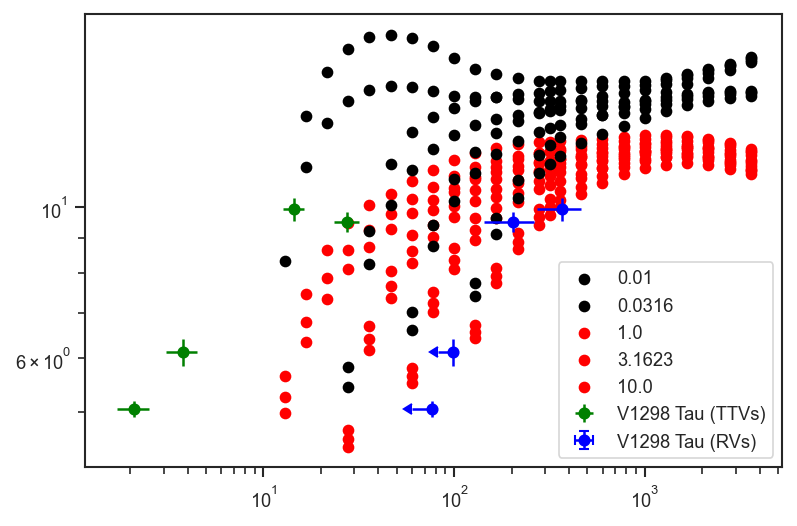

In [51]:
yrs = np.unique(df['t_gyr'])


for yr in yrs:
    arg = (df['t_gyr'] == yr) & (df['mcore_e']>0) & (df['a_au']>0.05)
    
    if (yr>=0.01) & (yr<=0.05):
        plt.scatter(df['mass_e'][arg], df['radius_j'][arg]*c.R_jup/c.R_earth, color='k', label=yr, zorder=np.inf)
        
    if (yr>=1) & (yr<=10):
        plt.scatter(df['mass_e'][arg], df['radius_j'][arg]*c.R_jup/c.R_earth, color='r', label=yr)    
    else:
        pass
    
    
plt.errorbar(v1298_masse, 
             v1298_rade,
             xerr=v1298_masseerr,
             yerr=v1298_radeerr, fmt='o', color=v1298_clr, label='V1298 Tau (TTVs)');

plt.errorbar(asm_masse, 
            v1298_rade, 
            xerr=asm_masseerr, 
            yerr=v1298_radeerr, 
            xuplims=xuplims,
            fmt='o', 
            color='b',
            capsize=0,
            zorder=np.inf, label='V1298 Tau (RVs)')

plt.legend()
plt.loglog()
plt.show()

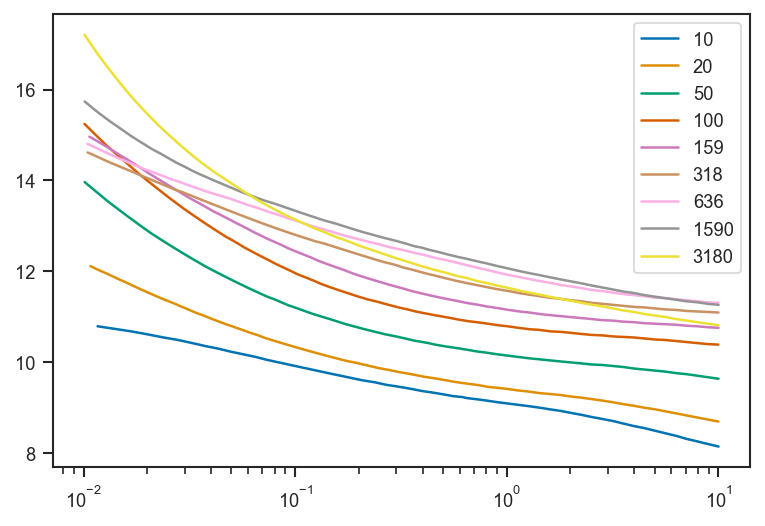

In [355]:
bar_trx = pd.read_csv('./baraffe2008/PLANET08_tracks.noirrad.csv')
bar_trx.head()

for m in np.unique(bar_trx['M_Mearth']):
    
    arg = (bar_trx['M_Mearth']==m) & (bar_trx['Z']==0.02)
    
    plt.plot(bar_trx['age_Gyr'][arg], bar_trx['R_RJup'][arg]*c.R_jup/c.R_earth, label=str(m))
    
    
plt.semilogx()
plt.legend()
plt.show()


#print(np.unique(bar_trx['Z']))

In [357]:
bar = pd.read_csv('./baraffe2008/PLANET08_iso.irrad.csv')
bar.head()

np.unique(bar['Z'])

array([0.02, 0.1 , 0.5 , 0.9 ])

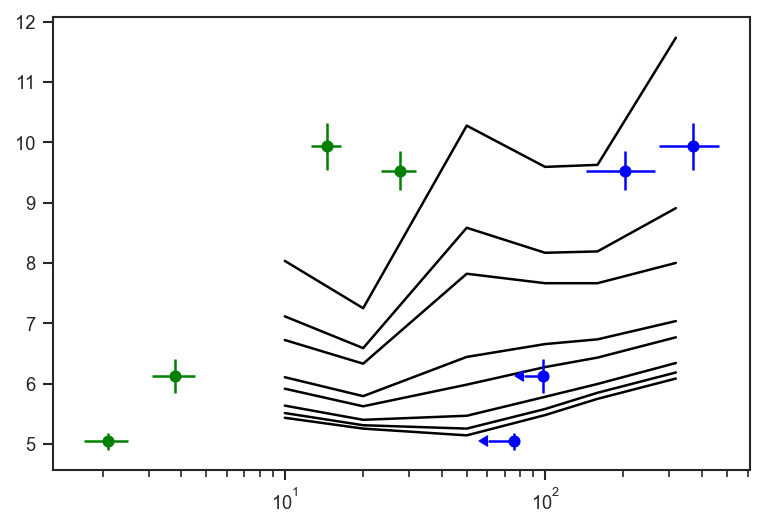

In [361]:
bar = pd.read_csv('./baraffe2008/PLANET08_iso.irrad.csv')
bar.head()

for age in np.unique(bar['age_Gyr']):
    
    arg = (bar['age_Gyr']==age) & (bar['Z']==0.9)
    
    plt.plot(bar['M_Mearth'][arg], bar['R_RJup'][arg]*c.R_jup/c.R_earth, color='k')
    
plt.errorbar(v1298_masse, 
             v1298_rade,
             xerr=v1298_masseerr,
             yerr=v1298_radeerr, fmt='o', color=v1298_clr, label='V1298 Tau (TTVs)');

plt.errorbar(asm_masse, 
            v1298_rade, 
            xerr=asm_masseerr, 
            yerr=v1298_radeerr, 
            xuplims=xuplims,
            fmt='o', 
            color='b',
            capsize=0,
            zorder=np.inf, label='V1298 Tau (RVs)')
    
    
plt.semilogx()
plt.show()

In [52]:
#separations:
# c: 0.0825 au
# d: 0.1083 au
# b: 0.1688 au
# e: 0.26944 au


v1298_sep_au = [0.0825, 0.1083, 0.1688, 0.2694]

In [ ]:
#./PlanetSolver -centralnum 1 0.3 -eosnum 2 0.65 -atmosphere 10.0 1.0 0.05 -star 1.1 0.934 2 0.0825 -mass 2.0 -evolve 1

-centralnum/-cn <central EOS number> <layer mass fraction>
-eosnum/-en <next EOS number> <layer mass fraction>
-atmosphere <entropy> <metallicity> <layer mass fraction>
-star/-s <mass> <luminosity> <spectral_type> <orbital_distance>

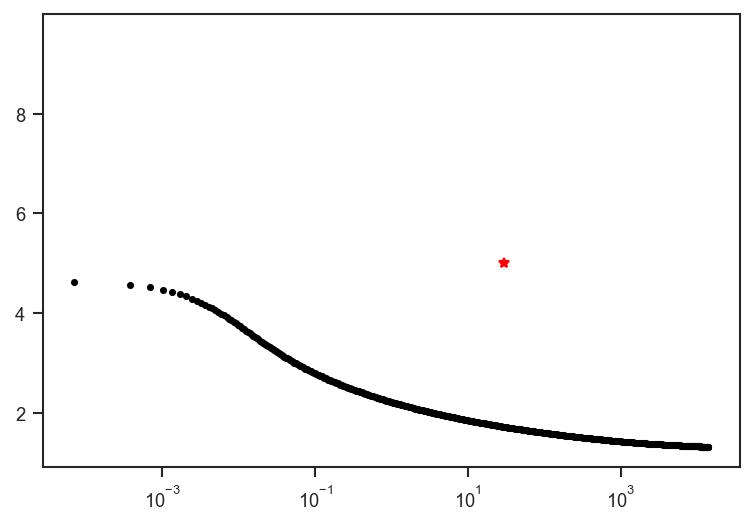

In [80]:
dat = np.loadtxt('/Users/tdavid/GitHub/PlanetSolver/Evolve.dat', skiprows=10)

plt.plot(dat[:,0], dat[:,2], 'k.')
plt.semilogx()
plt.plot(30, 5, 'r*')
#plt.ylim(3.,3.1)
plt.show()

In [350]:
crt1 = pd.read_csv('./chen2016/chen_rogers_2016_table1.csv')
crt1.head()

#print(np.unique(crt1['sep_au']))

,age_gyr,sep_au,mcore_mearth,mjup_0.0535,mjup_0.0881,mjup_0.115,mjup_0.242,mjup_0.406,mjup_0.676,mjup_1.0,mjup_1.46,mjup_2.44,mjup_4.07,mjup_6.78,mjup_11.31
0,0.3,0.02,0.0,NaN,NaN,NaN,NaN,15.32,14.47,14.09,14.00,14.02,14.00,13.87,13.55
1,0.3,0.02,10.0,13.17,15.37,15.26,14.57,14.22,13.87,13.79,13.83,13.95,14.04,13.98,13.69
2,0.3,0.02,25.0,NaN,5.12,8.28,11.95,12.79,13.15,13.33,13.54,13.80,13.98,13.98,13.74
3,0.3,0.02,50.0,NaN,NaN,NaN,8.18,10.70,11.98,12.60,13.04,13.51,13.82,13.92,13.75
4,0.3,0.02,100.0,NaN,NaN,NaN,NaN,6.73,9.80,11.14,12.05,12.91,13.47,13.73,13.68


In [84]:
import astropy.constants as c

In [85]:
0.0535*c.M_jup/c.M_earth

<Quantity 17.00381975>

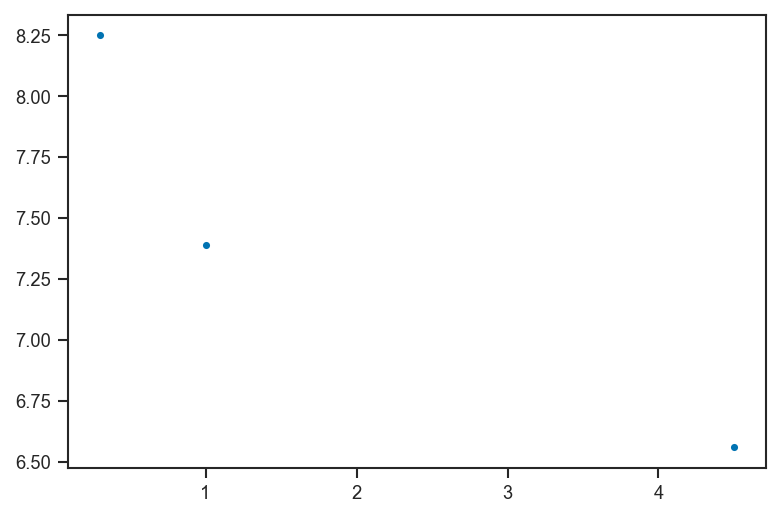

In [349]:
arg = (crt1['mcore_mearth'] == 10) & (crt1['sep_au'] == 0.1)


plt.plot(crt1['age_gyr'][arg], crt1['mjup_0.0535'][arg], '.')
plt.show()

# Lopez & Fortney 2014 power law fit

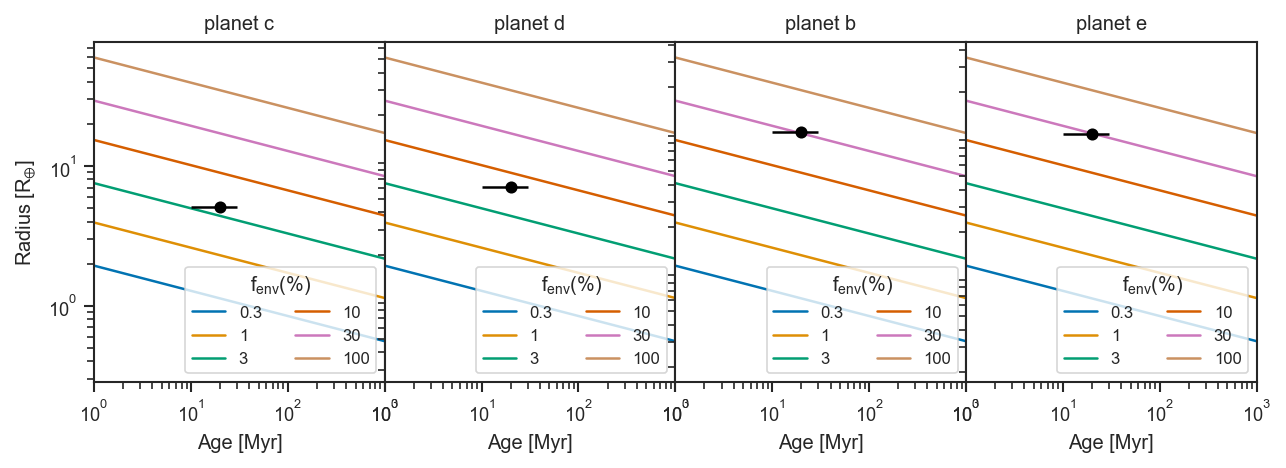

In [126]:
# Lopez & Fortney 2014
def Renv(Mp, fenv, Fp, age_gyr):
    #mp: planet mass in earth units
    #fenv: envelope mass fraction in percent
    #Fp: incident flux in earth units
    #age_gyr: age in Gyr
    #Note, these fits are only performed to models older than 100 Myr.
    
    return 2.06*(Mp)**(-0.21)*(fenv/5.)**0.59*(Fp)**0.044*(age_gyr/5.)**(-0.18)


v1298_Finc = [146, 85, 35, 10]
v1298_Fincerr = [20, 11, 5, 6]

age_gyr = np.linspace(0.001,10,1000)

fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(10,3))

for i,pl in enumerate(['c','d','b','e']):

    for fenv in [0.3,1,3,10,30,100]:
        ax[i].plot(1e3*age_gyr, Renv(v1298_masse[i], fenv, v1298_Finc[i], age_gyr), label=str(fenv))

    ax[i].errorbar(20, v1298_rade[i], xerr=10, yerr=v1298_radeerr[i], fmt='o', color='k')
    ax[i].loglog()
    ax[i].legend(ncol=2, loc='lower right', title=r'f$_\mathregular{env}$(%)', prop={'size':8})
    ax[i].set_xlim(1,1000)
    ax[i].set_xlabel('Age [Myr]')
    ax[i].set_title('planet '+pl)
    if i>0:
        ax[i].yaxis.set_major_locator(mpl.ticker.NullLocator())
    
    
ax[0].set_ylabel(r'Radius [R$_\mathregular{\oplus}$]')
plt.subplots_adjust(wspace=0)
plt.show()

# Lopez & Fortney 2014 tables

Text(0.5, 1.0, 'Lopez & Fortney 2014\nt=100 Myr\nFinc=10 F_Earth\nSolid = solar metallicity\nDashed = enhanced metallicity')

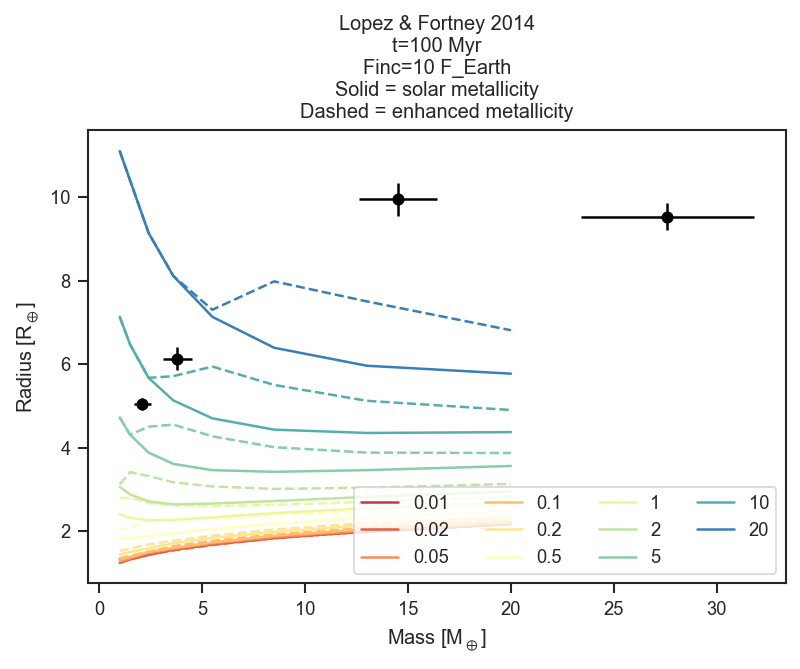

In [161]:
solarmet = pd.read_csv('./lopez2014/lopez_table1.csv')
enhanced = pd.read_csv('./lopez2014/lopez_table4.csv')

colors = sns.color_palette("Spectral",11)

for i,fenv in enumerate([0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20]):
    
    arg = (solarmet['Flux_Fearth'] == 10)
    
    plt.plot(solarmet['Mass_Mearth'][arg], 
             solarmet['fenv_'+str(fenv)+'pct'][arg],
             color=colors[i],
             label=str(fenv));
    
    
    arg = (enhanced['Flux_Fearth'] == 10)
    plt.plot(enhanced['Mass_Mearth'][arg], 
             enhanced['fenv_'+str(fenv)+'pct'][arg], 
             color=colors[i],
             ls='--');
    
# plt.errorbar(v1298_masse[3], 
#              v1298_rade[3], 
#              xerr=v1298_masseerr[3],
#              yerr=v1298_radeerr[3],
#              fmt='o')

plt.errorbar(v1298_masse, 
             v1298_rade, 
             xerr=v1298_masseerr,
             yerr=v1298_radeerr,
             fmt='o', color='k')

plt.xlabel(r'Mass [$\mathregular{M_\oplus}$]')
plt.ylabel('Radius [$\mathregular{R_\oplus}$]')
plt.legend(ncol=4, loc='lower right')
plt.title('Lopez & Fortney 2014\nt=100 Myr\nFinc=10 F_Earth\nSolid = solar metallicity\nDashed = enhanced metallicity')


#solar.head()
#Flux_Fearth,Mass_Mearth,fenv_0.01pct,fenv_0.02pct,fenv_0.05pct,fenv_0.1pct,fenv_0.2pct,fenv_0.5pct,fenv_1pct,fenv_2pct,fenv_5pct,fenv_10pct,fenv_20pct